### **CASE STUDY ON CROP YIELD PREDICTION MACHINE LEARNING MODEL**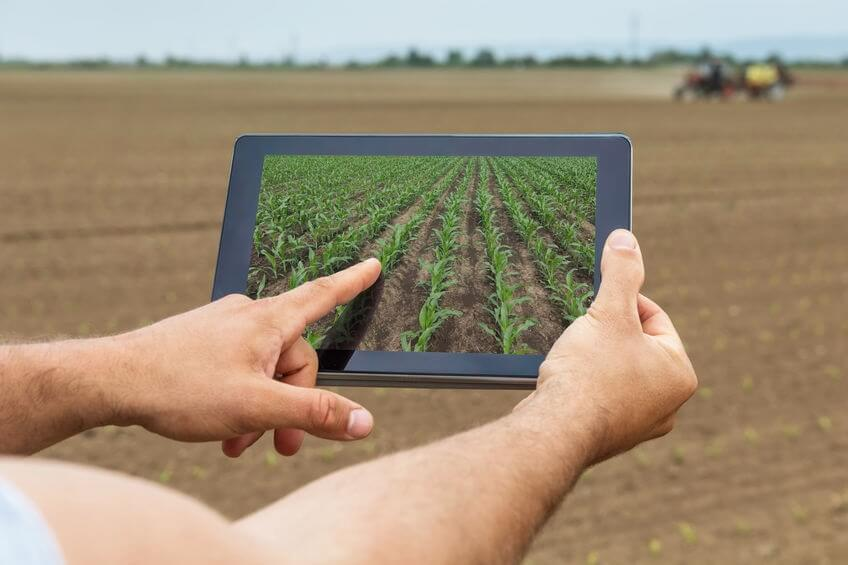

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("ICRISAT-District Level Data.csv")

In [3]:
data

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.20,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.30,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.50,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.40,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.40,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,1.58,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.84,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.95,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.11,0.00


In [4]:
#Data cleaning

#Filling the null values
outlier_columns = ['RICE YIELD (Kg per ha)','WHEAT YIELD (Kg per ha)','KHARIF SORGHUM YIELD (Kg per ha)','SORGHUM YIELD (Kg per ha)','PEARL MILLET YIELD (Kg per ha)','MAIZE YIELD (Kg per ha)','FINGER MILLET YIELD (Kg per ha)']
for col in outlier_columns:
      data[col]=data[col].fillna(data[col].median())


#Cleaning outliers
cols = ['Dist Code','RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)','RICE YIELD (Kg per ha)','WHEAT AREA (1000 ha)','WHEAT PRODUCTION (1000 tons)','WHEAT YIELD (Kg per ha)','KHARIF SORGHUM AREA (1000 ha)', 'KHARIF SORGHUM PRODUCTION (1000 tons)','KHARIF SORGHUM YIELD (Kg per ha)','SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)','SORGHUM YIELD (Kg per ha)','PEARL MILLET AREA (1000 ha)','PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)','MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)','MAIZE YIELD (Kg per ha)','FINGER MILLET AREA (1000 ha)','FINGER MILLET PRODUCTION (1000 tons)','FINGER MILLET YIELD (Kg per ha)','BARLEY AREA (1000 ha)','BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)','CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (1000 tons)','CHICKPEA YIELD (Kg per ha)','PIGEONPEA AREA (1000 ha)','PIGEONPEA PRODUCTION (1000 tons)', 'PIGEONPEA YIELD (Kg per ha)','MINOR PULSES AREA (1000 ha)', 'MINOR PULSES PRODUCTION (1000 tons)','MINOR PULSES YIELD (Kg per ha)','GROUNDNUT AREA (1000 ha)','GROUNDNUT PRODUCTION (1000 tons)', 'GROUNDNUT YIELD (Kg per ha)','SESAMUM AREA (1000 ha)', 'SESAMUM PRODUCTION (1000 tons)','SESAMUM YIELD (Kg per ha)','RAPESEED AND MUSTARD AREA (1000 ha)','RAPESEED AND MUSTARD PRODUCTION (1000 tons)','RAPESEED AND MUSTARD YIELD (Kg per ha)','CASTOR AREA (1000 ha)', 'CASTOR PRODUCTION (1000 tons)','CASTOR YIELD (Kg per ha)','LINSEED AREA (1000 ha)','LINSEED PRODUCTION (1000 tons)','LINSEED YIELD (Kg per ha)','SUNFLOWER AREA (1000 ha)', 'SUNFLOWER PRODUCTION (1000 tons)','SUNFLOWER YIELD (Kg per ha)','SOYABEAN YIELD (Kg per ha)','OILSEEDS AREA (1000 ha)', 'OILSEEDS PRODUCTION (1000 tons)','OILSEEDS YIELD (Kg per ha)','SUGARCANE AREA (1000 ha)','SUGARCANE PRODUCTION (1000 tons)', 'SUGARCANE YIELD (Kg per ha)','COTTON AREA (1000 ha)', 'COTTON PRODUCTION (1000 tons)','COTTON YIELD (Kg per ha)']  

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data[cols]=np.where(data[cols]>upper_whisker,upper_whisker,np.where(data[cols]<lower_whisker,lower_whisker,data[cols]))


#Dividing the dataset into 23 according to the crops
data_rice = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)','RICE YIELD (Kg per ha)']])
data_wheat = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','WHEAT AREA (1000 ha)','WHEAT PRODUCTION (1000 tons)','WHEAT YIELD (Kg per ha)']])
data_kharif = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','KHARIF SORGHUM AREA (1000 ha)', 'KHARIF SORGHUM PRODUCTION (1000 tons)','KHARIF SORGHUM YIELD (Kg per ha)' ]])
data_rabi = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','RABI SORGHUM AREA (1000 ha)','RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)']])
data_sorghum = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)','SORGHUM YIELD (Kg per ha)']])
data_pearl_millet = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','PEARL MILLET AREA (1000 ha)','PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)']])
data_maize = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)','MAIZE YIELD (Kg per ha)']])
data_finger_millet = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name', 'FINGER MILLET AREA (1000 ha)','FINGER MILLET PRODUCTION (1000 tons)','FINGER MILLET YIELD (Kg per ha)']])
data_barley = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','BARLEY AREA (1000 ha)','BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)']])
data_chickpea = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (1000 tons)','CHICKPEA YIELD (Kg per ha)']])
data_pigeonpea = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','PIGEONPEA AREA (1000 ha)','PIGEONPEA PRODUCTION (1000 tons)', 'PIGEONPEA YIELD (Kg per ha)']])
data_minor_pulses = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','MINOR PULSES AREA (1000 ha)', 'MINOR PULSES PRODUCTION (1000 tons)','MINOR PULSES YIELD (Kg per ha)']])
data_ground_nut = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','GROUNDNUT AREA (1000 ha)','GROUNDNUT PRODUCTION (1000 tons)', 'GROUNDNUT YIELD (Kg per ha)']])
data_sesamum = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','SESAMUM AREA (1000 ha)', 'SESAMUM PRODUCTION (1000 tons)','SESAMUM YIELD (Kg per ha)']])
data_rapeseed_mustard = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','RAPESEED AND MUSTARD AREA (1000 ha)','RAPESEED AND MUSTARD PRODUCTION (1000 tons)','RAPESEED AND MUSTARD YIELD (Kg per ha)']])
data_safflower = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','SAFFLOWER AREA (1000 ha)','SAFFLOWER PRODUCTION (1000 tons)', 'SAFFLOWER YIELD (Kg per ha)']])
data_castor = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','CASTOR AREA (1000 ha)', 'CASTOR PRODUCTION (1000 tons)','CASTOR YIELD (Kg per ha)']])
data_linseed = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','LINSEED AREA (1000 ha)','LINSEED PRODUCTION (1000 tons)','LINSEED YIELD (Kg per ha)']])
data_sunflower = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','SUNFLOWER AREA (1000 ha)', 'SUNFLOWER PRODUCTION (1000 tons)','SUNFLOWER YIELD (Kg per ha)']])
data_soybean = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','SOYABEAN AREA (1000 ha)','SOYABEAN PRODUCTION (1000 tons)', 'SOYABEAN YIELD (Kg per ha)']])
data_oilseed = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','OILSEEDS AREA (1000 ha)', 'OILSEEDS PRODUCTION (1000 tons)','OILSEEDS YIELD (Kg per ha)']])
data_sugarcane = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','SUGARCANE AREA (1000 ha)','SUGARCANE PRODUCTION (1000 tons)', 'SUGARCANE YIELD (Kg per ha)']])
data_cotton = pd.DataFrame(data[['Dist Code', 'Year', 'State Code', 'State Name','Dist Name','COTTON AREA (1000 ha)', 'COTTON PRODUCTION (1000 tons)','COTTON YIELD (Kg per ha)']])

dfs = [data_rice , data_wheat , data_kharif, data_rabi , data_sorghum , data_pearl_millet, data_maize , data_finger_millet , data_barley , data_chickpea , data_pigeonpea , data_minor_pulses , data_ground_nut , data_sesamum , data_rapeseed_mustard , data_safflower , data_castor , data_linseed , data_sunflower , data_soybean , data_oilseed , data_sugarcane , data_cotton]


#Encoding categorical variables

from sklearn.preprocessing import LabelEncoder
def onehot_encoding(df):
    df1= pd.get_dummies(df['State Name'])
    df = df.drop(['State Name'], axis = 1)
    df = df.merge(df1, left_index=True, right_index=True, how = "left")
    df = pd.DataFrame(df)
    return df

data_rice = onehot_encoding(data_rice)
data_wheat = onehot_encoding(data_wheat)
data_kharif = onehot_encoding(data_kharif)
data_rabi = onehot_encoding(data_rabi)
data_sorghum = onehot_encoding(data_sorghum)
data_pearl_millet = onehot_encoding(data_pearl_millet)
data_maize = onehot_encoding(data_maize)
data_finger_millet = onehot_encoding(data_finger_millet)
data_barley = onehot_encoding(data_barley)
data_chickpea = onehot_encoding(data_chickpea)
data_pigeonpea = onehot_encoding(data_pigeonpea)
data_minor_pulses = onehot_encoding(data_minor_pulses)
data_ground_nut = onehot_encoding(data_ground_nut)
data_sesamum = onehot_encoding(data_sesamum)
data_rapeseed_mustard = onehot_encoding(data_rapeseed_mustard)
data_safflower = onehot_encoding(data_safflower)
data_castor = onehot_encoding(data_castor)
data_linseed = onehot_encoding(data_linseed)
data_sunflower = onehot_encoding(data_sunflower)
data_soybean = onehot_encoding(data_soybean)
data_oilseed = onehot_encoding(data_oilseed)
data_sugarcane = onehot_encoding(data_sugarcane)
data_cotton = onehot_encoding(data_cotton)


In [6]:
enc = LabelEncoder()
def label_encoding(df):
    df['Dist Name'] = enc.fit_transform(df['Dist Name'])
    return df


data_rice = label_encoding(data_rice)
data_wheat = label_encoding(data_wheat)
data_kharif = label_encoding(data_kharif)
data_rabi = label_encoding(data_rabi)
data_sorghum = label_encoding(data_sorghum)
data_pearl_millet = label_encoding(data_pearl_millet)
data_maize = label_encoding(data_maize)
data_finger_millet = label_encoding(data_finger_millet)
data_barley = label_encoding(data_barley)
data_chickpea = label_encoding(data_chickpea)
data_pigeonpea = label_encoding(data_pigeonpea)
data_minor_pulses = label_encoding(data_minor_pulses)
data_ground_nut = label_encoding(data_ground_nut)
data_sesamum = label_encoding(data_sesamum)
data_rapeseed_mustard = label_encoding(data_rapeseed_mustard)
data_safflower = label_encoding(data_safflower)
data_castor = label_encoding(data_castor)
data_linseed = label_encoding(data_linseed)
data_sunflower = label_encoding(data_sunflower)
data_soybean = label_encoding(data_soybean)
data_oilseed = label_encoding(data_oilseed)
data_sugarcane = label_encoding(data_sugarcane)
data_cotton = label_encoding(data_cotton)


In [8]:
#Feature Reduction

data = data.drop(['VEGETABLES AREA (1000 ha)','FRUITS AND VEGETABLES AREA (1000 ha)', 'POTATOES AREA (1000 ha)', 'ONION AREA (1000 ha)', 'FODDER AREA (1000 ha)' ], axis=1)

#Feature Engineering

def feature_engg(df):
      cols = df.columns
      df['skew'] = df[cols].skew(axis = 1)
      df['kurt'] = df[cols].kurt(axis = 1)
      return df

data_rice = feature_engg(data_rice)
data_wheat = feature_engg(data_wheat)
data_kharif = feature_engg(data_kharif)
data_rabi = feature_engg(data_rabi)
data_sorghum = feature_engg(data_sorghum)
data_pearl_millet = feature_engg(data_pearl_millet)
data_maize = feature_engg(data_maize)
data_finger_millet = feature_engg(data_finger_millet)
data_barley = feature_engg(data_barley)
data_chickpea = feature_engg(data_chickpea)
data_pigeonpea = feature_engg(data_pigeonpea)
data_minor_pulses = feature_engg(data_minor_pulses)
data_ground_nut = feature_engg(data_ground_nut)
data_sesamum = feature_engg(data_sesamum)
data_rapeseed_mustard = feature_engg(data_rapeseed_mustard)
data_safflower = feature_engg(data_safflower)
data_castor = feature_engg(data_castor)
data_linseed = feature_engg(data_linseed)
data_sunflower = feature_engg(data_sunflower)
data_soybean = feature_engg(data_soybean)
data_oilseed = feature_engg(data_oilseed)
data_sugarcane = feature_engg(data_sugarcane)
data_cotton = feature_engg(data_cotton)

In [10]:
#Scaling the variable 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

def scaling(X):
    X1= X[['Dist Code','Year','State Code', 'Dist Name']]
    X = X.drop(['Dist Code','Year','State Code', 'Dist Name'], axis=1 )
    X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns, index =X.index)
    X = X.merge(X1, left_index=True, right_index=True, how = "left")
    return X


data_rice = scaling(data_rice)
data_wheat = scaling(data_wheat)
data_kharif = scaling(data_kharif)
data_rabi = scaling(data_rabi)
data_sorghum = scaling(data_sorghum)
data_pearl_millet = scaling(data_pearl_millet)
data_maize = scaling(data_maize)
data_finger_millet = scaling(data_finger_millet)
data_barley = scaling(data_barley)
data_chickpea = scaling(data_chickpea)
data_pigeonpea = scaling(data_pigeonpea)
data_minor_pulses = scaling(data_minor_pulses)
data_ground_nut = scaling(data_ground_nut)
data_sesamum = scaling(data_sesamum)
data_rapeseed_mustard = scaling(data_rapeseed_mustard)
data_safflower = scaling(data_safflower)
data_castor = scaling(data_castor)
data_linseed = scaling(data_linseed)
data_sunflower = scaling(data_sunflower)
data_soybean = scaling(data_soybean)
data_oilseed = scaling(data_oilseed)
data_sugarcane = scaling(data_sugarcane)
data_cotton = scaling(data_cotton)


In [12]:
#Data Modeling

#Defining x 
data_rice_x = data_rice.drop(['RICE YIELD (Kg per ha)'],axis = 1)
data_wheat_x = data_wheat.drop(['WHEAT YIELD (Kg per ha)'], axis =1)
data_kharif_x = data_kharif.drop(['KHARIF SORGHUM YIELD (Kg per ha)' ], axis =1)
data_rabi_x = data_rabi.drop(['RABI SORGHUM YIELD (Kg per ha)'], axis=1)
data_sorghum_x = data_sorghum.drop(['SORGHUM YIELD (Kg per ha)'], axis =1)
data_pearl_millet_x = data_pearl_millet.drop(['PEARL MILLET YIELD (Kg per ha)'], axis =1)
data_maize_x = data_maize.drop(['MAIZE YIELD (Kg per ha)'], axis =1)
data_finger_millet_x = data_finger_millet.drop(['FINGER MILLET YIELD (Kg per ha)'], axis =1)
data_barley_x = data_barley.drop(['BARLEY YIELD (Kg per ha)'], axis =1)
data_chickpea_x = data_chickpea.drop(['CHICKPEA YIELD (Kg per ha)'], axis =1)
data_pigeonpea_x = data_pigeonpea.drop(['PIGEONPEA YIELD (Kg per ha)'], axis =1)
data_minor_pulses_x = data_minor_pulses.drop(['MINOR PULSES YIELD (Kg per ha)'], axis=1)
data_ground_nut_x = data_ground_nut.drop(['GROUNDNUT YIELD (Kg per ha)'], axis =1)
data_sesamum_x = data_sesamum.drop(['SESAMUM YIELD (Kg per ha)'], axis = 1)
data_rapeseed_mustard_x = data_rapeseed_mustard.drop(['RAPESEED AND MUSTARD YIELD (Kg per ha)'], axis =1)
data_safflower_x = data_safflower.drop(['SAFFLOWER YIELD (Kg per ha)'], axis =1)
data_castor_x = data_castor.drop(['CASTOR YIELD (Kg per ha)'], axis =1)
data_linseed_x = data_linseed.drop(['LINSEED YIELD (Kg per ha)'], axis =1)
data_sunflower_x = data_sunflower.drop(['SUNFLOWER YIELD (Kg per ha)'], axis =1)
data_soybean_x = data_soybean.drop(['SOYABEAN YIELD (Kg per ha)'], axis =1)
data_oilseed_x = data_oilseed.drop(['OILSEEDS YIELD (Kg per ha)'], axis =1)
data_sugarcane_x = data_sugarcane.drop(['SUGARCANE YIELD (Kg per ha)'], axis = 1)
data_cotton_x = data_cotton.drop(['COTTON YIELD (Kg per ha)'], axis = 1)

#Defining y
data_rice_y = data_rice['RICE YIELD (Kg per ha)']
data_wheat_y = data_wheat['WHEAT YIELD (Kg per ha)']
data_kharif_y = data_kharif['KHARIF SORGHUM YIELD (Kg per ha)']
data_rabi_y = data_rabi['RABI SORGHUM YIELD (Kg per ha)']
data_sorghum_y = data_sorghum['SORGHUM YIELD (Kg per ha)']
data_pearl_millet_y = data_pearl_millet['PEARL MILLET YIELD (Kg per ha)']
data_maize_y = data_maize['MAIZE YIELD (Kg per ha)']
data_finger_millet_y = data_finger_millet['FINGER MILLET YIELD (Kg per ha)']
data_barley_y = data_barley['BARLEY YIELD (Kg per ha)']
data_chickpea_y = data_chickpea['CHICKPEA YIELD (Kg per ha)']
data_pigeonpea_y = data_pigeonpea['PIGEONPEA YIELD (Kg per ha)']
data_minor_pulses_y = data_minor_pulses['MINOR PULSES YIELD (Kg per ha)']
data_ground_nut_y= data_ground_nut['GROUNDNUT YIELD (Kg per ha)']
data_sesamum_y= data_sesamum['SESAMUM YIELD (Kg per ha)']
data_rapeseed_mustard_y = data_rapeseed_mustard['RAPESEED AND MUSTARD YIELD (Kg per ha)']
data_safflower_y = data_safflower['SAFFLOWER YIELD (Kg per ha)']
data_castor_y = data_castor['CASTOR YIELD (Kg per ha)']
data_linseed_y = data_linseed['LINSEED YIELD (Kg per ha)']
data_sunflower_y = data_sunflower['SUNFLOWER YIELD (Kg per ha)']
data_soybean_y = data_soybean['SOYABEAN YIELD (Kg per ha)']
data_oilseed_y = data_oilseed['OILSEEDS YIELD (Kg per ha)']
data_sugarcane_y = data_sugarcane['SUGARCANE YIELD (Kg per ha)']
data_cotton_y = data_cotton['COTTON YIELD (Kg per ha)']

In [14]:
dfs = [ (data_rice_x , data_rice_y ) , (data_wheat_x , data_wheat_y) , (data_kharif_x,data_kharif_y),(data_rabi_x,data_rabi_y) , (data_sorghum_x,data_sorghum_y) , (data_pearl_millet_x,data_pearl_millet_y) , (data_maize_x,data_maize_y) , (data_finger_millet_x,data_finger_millet_y) , (data_barley_x,data_barley_y) , (data_chickpea_x,data_chickpea_y) , (data_pigeonpea_x,data_pigeonpea_y)  , (data_minor_pulses_x,data_minor_pulses_y) , (data_ground_nut_x,data_ground_nut_y)  , (data_sesamum_x,data_sesamum_y) , (data_rapeseed_mustard_x,data_rapeseed_mustard_y) , (data_safflower_x,data_safflower_y) , (data_castor_x,data_castor_y) , (data_linseed_x,data_linseed_y) , (data_sunflower_x,data_sunflower_y) , (data_soybean_x,data_soybean_y) , (data_oilseed_x,data_oilseed_y) , (data_sugarcane_x,data_sugarcane_y) , (data_cotton_x,data_cotton_y) ]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [16]:
def TrainandTestwithAlgorithm(X,y,algorithm,modelname):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = algorithm
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    print('MSE is: ',mean_squared_error(y_test,prediction))
    print('MAE is: ',mean_absolute_error(y_test,prediction))
    print('R-squared is: ',r2_score(y_test,prediction))
    model = {}
    
    model['Algorithm'] = modelname
    model['MSE'] = mean_squared_error(y_test,prediction)
    model['MAE'] = mean_absolute_error(y_test,prediction)
    model['R2'] = r2_score(y_test,prediction)
    
    return model

In [17]:
DataModels = pd.DataFrame()

algorithms = {"Random Forest": RandomForestRegressor(),"Linear Regression": linear_model.LinearRegression(),"Lasso": Lasso(alpha=0.001),
              "Support Vector Regression": SVR(C=8,epsilon=0.2,gamma=0.5)}

In [18]:
for i in dfs:
  obj1,obj2=i
  for i,j in algorithms.items():
    print("Algorithm Performance: {}".format(i))    
    model = TrainandTestwithAlgorithm(obj1,obj2,j,i)
    DataModels = DataModels.append(model,ignore_index=True)    
    print()  
    DataModels.sort_values(by='MSE',ascending=False)

Algorithm Performance: Random Forest
MSE is:  0.024966922888828305
MAE is:  0.06195690479961289
R-squared is:  0.9747627998732441

Algorithm Performance: Linear Regression
MSE is:  0.18027552998849178
MAE is:  0.29549627217422797
R-squared is:  0.8215537331094384

Algorithm Performance: Lasso


D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e+02, tolerance: 1.299e+00
  model = cd_fast.enet_coordinate_descent(


MSE is:  0.18101833369073764
MAE is:  0.3003186522318146
R-squared is:  0.8148099412724358

Algorithm Performance: Support Vector Regression
MSE is:  0.2773752131828087
MAE is:  0.4137944046245022
R-squared is:  0.7231094345268175

Algorithm Performance: Random Forest
MSE is:  0.016798481742438795
MAE is:  0.044417914916116366
R-squared is:  0.9832514279559698

Algorithm Performance: Linear Regression
MSE is:  0.12717944535341935
MAE is:  0.25677532460323305
R-squared is:  0.8742724682111431

Algorithm Performance: Lasso
MSE is:  0.12618508686957242
MAE is:  0.2518542628314142
R-squared is:  0.874298996451559

Algorithm Performance: Support Vector Regression
MSE is:  0.2502113645087896
MAE is:  0.3906876712965661
R-squared is:  0.7524518705335667

Algorithm Performance: Random Forest
MSE is:  0.005949564521523781
MAE is:  0.018804079568050497
R-squared is:  0.9941449189647094

Algorithm Performance: Linear Regression
MSE is:  0.04415733953973403
MAE is:  0.1341174113615958
R-squared is

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.755e+01, tolerance: 1.287e+00
  model = cd_fast.enet_coordinate_descent(


MSE is:  0.02072645191431151
MAE is:  0.11381673656001572
R-squared is:  0.9795757818168092

Algorithm Performance: Support Vector Regression
MSE is:  0.3845077268659366
MAE is:  0.45531837260803165
R-squared is:  0.6138402542558246

Algorithm Performance: Random Forest
MSE is:  0.012668776546713412
MAE is:  0.02740217643690359
R-squared is:  0.9871700333286406

Algorithm Performance: Linear Regression
MSE is:  0.06276353593325938
MAE is:  0.1639148288240691
R-squared is:  0.9367175862598978

Algorithm Performance: Lasso
MSE is:  0.07647722587073633
MAE is:  0.16451030429291308
R-squared is:  0.9256497936376034

Algorithm Performance: Support Vector Regression
MSE is:  0.28920051796329316
MAE is:  0.3967421446658661
R-squared is:  0.715018938767502

Algorithm Performance: Random Forest
MSE is:  0.0012419151671408384
MAE is:  0.017527829117313064
R-squared is:  0.9987741275215916

Algorithm Performance: Linear Regression
MSE is:  0.022749545546114334
MAE is:  0.122176912358363
R-squared

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.352e+02, tolerance: 1.300e+00
  model = cd_fast.enet_coordinate_descent(


MSE is:  0.04320790419622537
MAE is:  0.17123752421044353
R-squared is:  0.9556385198306921

Algorithm Performance: Support Vector Regression
MSE is:  0.3707807681848954
MAE is:  0.4637671789528779
R-squared is:  0.6228017689024061

Algorithm Performance: Random Forest
MSE is:  0.0007428642764393199
MAE is:  0.008969457347605944
R-squared is:  0.9992656437984367

Algorithm Performance: Linear Regression
MSE is:  0.02179754810899247
MAE is:  0.10507290440401594
R-squared is:  0.9783894668384581

Algorithm Performance: Lasso
MSE is:  0.022167808014396
MAE is:  0.11023860001388068
R-squared is:  0.9779254683070723

Algorithm Performance: Support Vector Regression
MSE is:  0.3068631509055455
MAE is:  0.41327801166882494
R-squared is:  0.6944144567076671

Algorithm Performance: Random Forest
MSE is:  0.0022315012854247545
MAE is:  0.007353050634344637
R-squared is:  0.9977996093996149

Algorithm Performance: Linear Regression
MSE is:  0.02002390485539716
MAE is:  0.0952903382461433
R-square

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.318e+01, tolerance: 1.267e+00
  model = cd_fast.enet_coordinate_descent(


MSE is:  0.10165018280579097
MAE is:  0.11703332298212876
R-squared is:  0.9055718836973417

Algorithm Performance: Support Vector Regression
MSE is:  0.5613060549846915
MAE is:  0.4505140896970934
R-squared is:  0.47279660751316666

Algorithm Performance: Random Forest
MSE is:  0.0030715905315134256
MAE is:  0.006910585512708964
R-squared is:  0.9968098828268904

Algorithm Performance: Linear Regression
MSE is:  0.006294207451565634
MAE is:  0.06120751881172165
R-squared is:  0.9937166749583006

Algorithm Performance: Lasso


D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+00, tolerance: 1.289e+00
  model = cd_fast.enet_coordinate_descent(


MSE is:  0.016384088380016294
MAE is:  0.08802254652541815
R-squared is:  0.9837329493533533

Algorithm Performance: Support Vector Regression
MSE is:  0.31199385452625267
MAE is:  0.4346082308389826
R-squared is:  0.6896819342533966

Algorithm Performance: Random Forest
MSE is:  0.003956551830600144
MAE is:  0.010346932298753829
R-squared is:  0.9959673258447463

Algorithm Performance: Linear Regression
MSE is:  0.012166936718569247
MAE is:  0.08362454316342874
R-squared is:  0.9879614873794703

Algorithm Performance: Lasso


D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.608e+01, tolerance: 1.298e+00
  model = cd_fast.enet_coordinate_descent(


MSE is:  0.027067611284368253
MAE is:  0.12105867635343512
R-squared is:  0.9723693239988538

Algorithm Performance: Support Vector Regression
MSE is:  0.3578449067851921
MAE is:  0.45044596620717126
R-squared is:  0.6434524797291088

Algorithm Performance: Random Forest
MSE is:  0.00057102450272489
MAE is:  0.0036113721173723387
R-squared is:  0.9994305971830958

Algorithm Performance: Linear Regression
MSE is:  0.0036532968269744177
MAE is:  0.044285767792010024
R-squared is:  0.9963952545393036

Algorithm Performance: Lasso
MSE is:  0.007348060179544987
MAE is:  0.0594400408457105
R-squared is:  0.9926503852187429

Algorithm Performance: Support Vector Regression
MSE is:  0.3050140282202035
MAE is:  0.4383226265612352
R-squared is:  0.6978028866094543

Algorithm Performance: Random Forest
MSE is:  0.0006745794064611462
MAE is:  0.003432566113446203
R-squared is:  0.9993206093536304

Algorithm Performance: Linear Regression
MSE is:  0.01207110301457961
MAE is:  0.07257949154745981
R-

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+03, tolerance: 1.290e+00
  model = cd_fast.enet_coordinate_descent(


MSE is:  0.4073962337811165
MAE is:  0.4643004921347781
R-squared is:  0.594589326917468

Algorithm Performance: Support Vector Regression
MSE is:  0.3175843646282864
MAE is:  0.4150947634042837
R-squared is:  0.6833487587746414

Algorithm Performance: Random Forest
MSE is:  0.0039856482410368255
MAE is:  0.017089379567313163
R-squared is:  0.9960582687092566

Algorithm Performance: Linear Regression
MSE is:  0.03126457053203201
MAE is:  0.1394366583855112
R-squared is:  0.9677773957892062

Algorithm Performance: Lasso


D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+02, tolerance: 1.289e+00
  model = cd_fast.enet_coordinate_descent(


MSE is:  0.0657859368524074
MAE is:  0.19856952275821846
R-squared is:  0.934798627343166

Algorithm Performance: Support Vector Regression
MSE is:  0.3119759120643989
MAE is:  0.42557314321937006
R-squared is:  0.6759504226422247



In [21]:
DataModels

,Algorithm,MSE,MAE,R2
0,Random Forest,0.024967,0.061957,0.974763
1,Linear Regression,0.180276,0.295496,0.821554
2,Lasso,0.181018,0.300319,0.814810
3,Support Vector Regression,0.277375,0.413794,0.723109
4,Random Forest,0.016798,0.044418,0.983251
...,...,...,...,...
87,Support Vector Regression,0.317584,0.415095,0.683349
88,Random Forest,0.003986,0.017089,0.996058
89,Linear Regression,0.031265,0.139437,0.967777
90,Lasso,0.065786,0.198570,0.934799


In [22]:
type(DataModels)

pandas.core.frame.DataFrame

# Data Insight:
While looking at the 92 models created for the 23 crops using Linear Regression, Random Forest Regressor, Lasso Regressor and Support Vector Regression we can see that the Random Forest Regressor has constantly maintained a better perfomance to other models when comparing there MSE and R-squared values.   

# Hyperparameter Tuning

Using GridSearchCV to find best parameter for RandomForestRegressor (Tuning RandomForestRegressor)

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}


In [42]:
def random_forest_regression_model(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    model_rf = RandomForestRegressor()
    model_rf.fit(X_train,y_train)
    grid = GridSearchCV(model_rf, param_grid , refit = True , verbose = 3)
    grid.fit(X_train , y_train)
    grid.best_params_
    return grid.best_params_

In [43]:
tuned_model=[]
for i in dfs:
    obj1,obj2=i 
    tuned_model.append(random_forest_regression_model(obj1,obj2))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.744 total time=   3.0s
[CV 2/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.749 total time=   3.0s
[CV 3/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.741 total time=   3.0s
[CV 4/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.712 total time=   3.0s
[CV 5/5] END max_depth=4, max_features=auto, n_estimators=200;, score=0.713 total time=   3.0s
[CV 1/5] END max_depth=4, max_features=auto, n_estimators=500;, score=0.745 total time=   7.7s
[CV 2/5] END max_depth=4, max_features=auto, n_estimators=500;, score=0.746 total time=   7.7s
[CV 3/5] END max_depth=4, max_features=auto, n_estimators=500;, score=0.738 total time=   7.7s
[CV 4/5] END max_depth=4, max_features=auto, n_estimators=500;, score=0.713 total time=   7.7s
[CV 5/5] END max_depth=4, max_features=auto, n_estimators=500;, score=0.712 total t

In [44]:
tuned_model

[{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500},
 {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200},
 {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200},
 {'max_depth': 8, 'max_features': 'auto'

**Applying RandomForestRegressor with best parameter we get from GridSearchCV**

In [46]:
tuned_model = RandomForestRegressor(max_depth =8,max_features='auto',n_estimators=500)

In [47]:
def final_model(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = RandomForestRegressor(max_depth =8,max_features='auto',n_estimators=500)
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    print('MSE is: ',mean_squared_error(y_test,prediction))
    print('MAE is: ',mean_absolute_error(y_test,prediction))
    print('R-squared is: ',r2_score(y_test,prediction))
    

In [48]:
for i in dfs:
    obj1,obj2=i
    final_model(obj1,obj2)
    

MSE is:  0.09454443895626077
MAE is:  0.18201298058078902
R-squared is:  0.9057604503122105
MSE is:  0.03788265118587567
MAE is:  0.09336281136230856
R-squared is:  0.9612372797155349
MSE is:  0.008702688938054443
MAE is:  0.03079655584911726
R-squared is:  0.9913724826093944
MSE is:  0.10686532358001707
MAE is:  0.053482640967697406
R-squared is:  0.8794138824211911
MSE is:  0.006104935728798988
MAE is:  0.027874131278892045
R-squared is:  0.9938334265650325
MSE is:  0.0025004396820186413
MAE is:  0.020711114925818844
R-squared is:  0.9974769692663572
MSE is:  0.11273175698330941
MAE is:  0.15789737162823855
R-squared is:  0.8872635331258745
MSE is:  0.00041937555177479766
MAE is:  0.008518736898347243
R-squared is:  0.9995605272067788
MSE is:  0.03429928029279485
MAE is:  0.06233868260614079
R-squared is:  0.9665959688046746
MSE is:  0.001380721980041083
MAE is:  0.026287913469024617
R-squared is:  0.9986120078537434
MSE is:  0.0015734647890305515
MAE is:  0.022665481117326584
R-squa

# Conclusion: 
We have seen that Random Forest Regressor Algorithm has maintained a good perfomance before and after hyperparameter tuning and hence will be used as the model for the prediction of crop yield.

<h2>Submitted by:</h2>
    Group 8 (Anand M Nair, Ashwanth V, Midhuna Prasad R, Shyma S, Zeenath M)
    NORKA DSA BATCH 02 2021 
<h2>Submitted on:</h2>
    13-03-2022